<a href="https://colab.research.google.com/github/hzqldjb/twitter_sentiment/blob/main/covid_mood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# description: sentiment analysis program that parse tweets fetched from twitter using python

In [ ]:
# import libraries

import json
import csv
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
consumerKey = 'uh51k9NFjtJ6257gcXySb2Uil'
consumerSecret = 'O1FnKvyfuHxEArZxKT7DMVOrUpcAkLFsbXPjjgT8cTPvyqFJmL'
accessToken = '860619712765480960-UeaspbgzACmLxOAocgTGIpk2iij9Wl4'
accessTokenSecret = 'mkOJp8LTtWndPPIlNqDuEfCtFxHqqXBcKoYqpMXf1WGsU'

In [ ]:
# creat the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# set the access token and access secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# create the API object while passing in the auth inofrmation
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
# extract tweets data from tweepy and saved as cvs file

def search_for_hashtags(hashtag_phrase):
  
  # regular expression with format {#x AND/OR #y}
  fname = '_'.join(re.findall(r"#(\w+)", hashtag_phrase))

  # open the spreadsheet we will write to
  with open('%s.csv' % (fname), 'w') as file:

    w = csv.writer(file)

    # write header row to spreadsheet
    w.writerow(['timestamp', 'tweet_text', 'username', 'all_hashtags', 'followers_count'])
    
    #for each tweet matching our hashtags, write relevant info to the spreadsheet
    for tweet in tweepy.Cursor(api.search, q=hashtag_phrase+' -filter:retweets', \
                               lang="en", tweet_mode='extended').items(100):
        w.writerow([tweet.created_at, tweet.full_text.replace('\n',' ').encode('utf-8'), tweet.user.screen_name.encode('utf-8'), [e['text'] for e in tweet._json['entities']['hashtags']], tweet.user.followers_count])


In [ ]:
# must type the input as { #x AND/OR #y } because of the regular epression 
hashtag_phrase = input('Hashtag Phrase ')

# extract tweets from twitter and generate a .csv file 
search_for_hashtags(hashtag_phrase)


In [ ]:
# load csv files
from google.colab import files
files.upload()

Saving covid.csv to covid.csv


{'covid.csv': b'timestamp,tweet_text,username,all_hashtags,followers_count\r\n2021-03-08 18:38:28,"b\'@FoxNews Gov Abbot is the one who said that TX should be reopened with no #COVID restrictions, so what\\xe2\\x80\\x99s the issue again? The state is wide open, right?\'",b\'sugarcane_tea\',[\'COVID\'],235\r\n2021-03-08 18:38:17,b\'Emma Hardy MP quits shadow minster role over Covid workload https://t.co/kPhvxtJu0v  #Covid #Coronavirus\',b\'au_pis_aller\',"[\'Covid\', \'Coronavirus\']",556\r\n2021-03-08 18:38:16,"b\'So surely the question is now, Have any of the numbers we\\xe2\\x80\\x99ve been told ever been correct ? And can we ever trust anything that comes out of their lying mouths again ? #IsleofMan #COVIDIOT #COVID #Manx #LyingBastards #StaySafe\'",b\'manx636\',"[\'IsleofMan\', \'COVIDIOT\', \'COVID\', \'Manx\', \'LyingBastards\', \'StaySafe\']",35\r\n2021-03-08 18:38:13,"b\'""To build forward better from the #COVID-19 crisis &amp; to get the Global Goals firmly back on track we ca

In [ ]:
# store the data into variables
df = pd.read_csv('covid.csv')

# show the twitter_text 
df['tweet_text']


In [ ]:
# clean the text

#create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removes @mentions
  text = re.sub(r'#', '', text) #removes the '#' symbol
  text = re.sub(r'RT[\s]+','',text) #removes RT
  text = re.sub(r'https?:\/\/\S+','',text) # removes the hyperlink

  return text

# clean the text
df['tweet_text'] = df['tweet_text'].apply(cleanTxt)

# show the cleaned text
df



,timestamp,tweet_text,username,all_hashtags,followers_count
0,2021-03-08 18:38:28,b' Gov Abbot is the one who said that TX shoul...,b'sugarcane_tea',['COVID'],235
1,2021-03-08 18:38:17,b'Emma Hardy MP quits shadow minster role over...,b'au_pis_aller',"['Covid', 'Coronavirus']",556
2,2021-03-08 18:38:16,"b'So surely the question is now, Have any of t...",b'manx636',"['IsleofMan', 'COVIDIOT', 'COVID', 'Manx', 'Ly...",35
3,2021-03-08 18:38:13,"b'""To build forward better from the COVID-19 c...",b'UNDPJamaica',"['COVID', 'IWD2021']",3412
4,2021-03-08 18:38:13,"b"" With covid still lingering into the spring,...",b'navigator_nick',['covid'],358
...,...,...,...,...,...
95,2021-03-08 18:23:19,b'A 40-year-old obsessive-compulsive disorder ...,b'Aphios',['COVID'],483
96,2021-03-08 18:23:18,b'CDC says people who are fully vaccinated aga...,b'upstractcom',"['cdc', 'covid', 'newyork', 'cnbccdc', 'people...",1741
97,2021-03-08 18:23:13,"b""We're now in our second WomensDay under COVI...",b'KellyTClements',"['WomensDay', 'COVID']",11467
98,2021-03-08 18:23:12,b'Just watch. Democrats are going to tax your ...,b'corrcomm',"['Democrats', 'Covid', 'stimulus']",6826


In [ ]:
# create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# create two new columns
df['Subjectivity'] = df['tweet_text'].apply(getSubjectivity)
df ['Polarity'] = df['tweet_text'].apply(getPolarity)

# show the new dataframe with the new columns
df

,timestamp,tweet_text,username,all_hashtags,followers_count,Subjectivity,Polarity
0,2021-03-08 18:38:28,b' Gov Abbot is the one who said that TX shoul...,b'sugarcane_tea',['COVID'],235,0.478571,0.061905
1,2021-03-08 18:38:17,b'Emma Hardy MP quits shadow minster role over...,b'au_pis_aller',"['Covid', 'Coronavirus']",556,0.000000,0.000000
2,2021-03-08 18:38:16,"b'So surely the question is now, Have any of t...",b'manx636',"['IsleofMan', 'COVIDIOT', 'COVID', 'Manx', 'Ly...",35,0.888889,0.500000
3,2021-03-08 18:38:13,"b'""To build forward better from the COVID-19 c...",b'UNDPJamaica',"['COVID', 'IWD2021']",3412,0.220000,0.100000
4,2021-03-08 18:38:13,"b"" With covid still lingering into the spring,...",b'navigator_nick',['covid'],358,0.663690,0.445536
...,...,...,...,...,...,...,...
95,2021-03-08 18:23:19,b'A 40-year-old obsessive-compulsive disorder ...,b'Aphios',['COVID'],483,0.000000,0.000000
96,2021-03-08 18:23:18,b'CDC says people who are fully vaccinated aga...,b'upstractcom',"['cdc', 'covid', 'newyork', 'cnbccdc', 'people...",1741,0.500000,0.500000
97,2021-03-08 18:23:13,"b""We're now in our second WomensDay under COVI...",b'KellyTClements',"['WomensDay', 'COVID']",11467,0.395833,0.062500
98,2021-03-08 18:23:12,b'Just watch. Democrats are going to tax your ...,b'corrcomm',"['Democrats', 'Covid', 'stimulus']",6826,0.100000,-0.100000


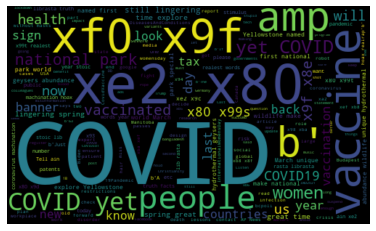

In [ ]:
# plot the word cloud
allWords = ''.join([twts for twts in df['tweet_text']]) 
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [ ]:
# create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,timestamp,tweet_text,username,all_hashtags,followers_count,Subjectivity,Polarity,Analysis
0,2021-03-08 18:38:28,b' Gov Abbot is the one who said that TX shoul...,b'sugarcane_tea',['COVID'],235,0.478571,0.061905,Positive
1,2021-03-08 18:38:17,b'Emma Hardy MP quits shadow minster role over...,b'au_pis_aller',"['Covid', 'Coronavirus']",556,0.000000,0.000000,Neutral
2,2021-03-08 18:38:16,"b'So surely the question is now, Have any of t...",b'manx636',"['IsleofMan', 'COVIDIOT', 'COVID', 'Manx', 'Ly...",35,0.888889,0.500000,Positive
3,2021-03-08 18:38:13,"b'""To build forward better from the COVID-19 c...",b'UNDPJamaica',"['COVID', 'IWD2021']",3412,0.220000,0.100000,Positive
4,2021-03-08 18:38:13,"b"" With covid still lingering into the spring,...",b'navigator_nick',['covid'],358,0.663690,0.445536,Positive
...,...,...,...,...,...,...,...,...
95,2021-03-08 18:23:19,b'A 40-year-old obsessive-compulsive disorder ...,b'Aphios',['COVID'],483,0.000000,0.000000,Neutral
96,2021-03-08 18:23:18,b'CDC says people who are fully vaccinated aga...,b'upstractcom',"['cdc', 'covid', 'newyork', 'cnbccdc', 'people...",1741,0.500000,0.500000,Positive
97,2021-03-08 18:23:13,"b""We're now in our second WomensDay under COVI...",b'KellyTClements',"['WomensDay', 'COVID']",11467,0.395833,0.062500,Positive
98,2021-03-08 18:23:12,b'Just watch. Democrats are going to tax your ...,b'corrcomm',"['Democrats', 'Covid', 'stimulus']",6826,0.100000,-0.100000,Negative


In [ ]:
# print all of the positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j)+') '+sortedDF['tweet_text'][i])
    print()
    j = j+1

In [ ]:
# print the negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'],ascending='False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j)+') '+sortedDF['Tweets'][i])
    print()
    j = j+1

In [ ]:
# plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i],color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['tweet_text']

round( (ptweets.shape[0] / df.shape[0]) * 100, 1)

43.0

In [ ]:
# get the percentage of Negative tweets
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['tweet_text']

round( (ptweets.shape[0] / df.shape[0]) * 100, 1)

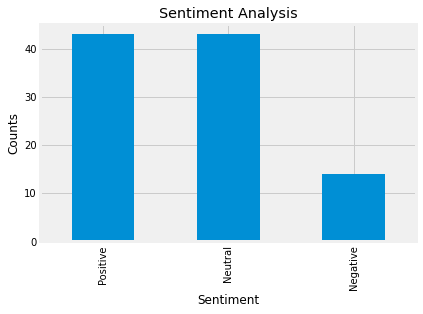

In [ ]:
# show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()